# PyFolding SI Notebook 2
---

[Authors] ERGM

---

## Fitting Gankyrin Data to various kinetic models in series

In this notebook we will fit more complicated models to some example data. Here the idea is to show that we can fit multiple models in series to folding data. The models are slightly more complex than two-state folding (Pyfolding SI Notebook 1.) These models can be used with in bought software, but with PyFolding we can automate and is Free!

If you are less script/computer orientated, you can simply change the data paths/variables, etc for your proteins and re-run the jupyter notebook ( "Kernal/Restart & Run all" from the menu above).

In this notebook I will be using data from the paper below:

```
Mapping the Topography of a Protein Energy Landscape
Hutton, R. D., Wilkinson, J., Faccin, M., Sivertsson, E. M., Pelizzola, A., Lowe, A. R., Bruscolini, P. & Itzhaki, L. S.
J Am Chem Soc (2015) 127, 46: 14610-25
```
[http://pubs.acs.org/doi/10.1021/jacs.5b07370]



### Data Format

See PyFolding SI Notebook 1 for how to set up your .csv files for import 

### Special Considerations

1. If you wish to perform global analyses on folding data, the datasets of the same WT/mutant concerned must be in the same .csv
2. Kinetics data should be entered as rate constants ( *k* ) and NOT as the `log` of the rate constant.
3. There can be no "empty" cells in the x-axis variables in the .csv file for kinetics data.

---

Example .csv structure:

urea   |k1	      |k2
:-----: |:------: |:-------:
8.59   |	1.72  |		
8.77   |	1.96  |		
9.00   |	2.41  |		
0.54   |	5.44  |	23.6
0.79   |	5.94  |	21.2
1.02   |	6.56  |	21.6
...    | ...      | ...

---

In [1]:
# As in previous notebook, lets load pyfolding & pyplot into this ipython notebook 
#(pyplot allows us to plot more complex figures of our results):

%matplotlib inline
import pyfolding
from pyfolding import models

# let's use some other libraries also
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


---

#### Now, we need to load some data to analyse.

In [2]:

# loading the data - The kinetics of each protein is in one .csv as per the example .csv above
pth = "../examples/Gankyrin"
GankyrinChevron = pyfolding.read_kinetic_data(pth,"GankyrinWTChevron.csv")

# let's give this dataset a good name
GankyrinChevron.ID = 'Gankyrin WT'

Let's plot the chevron phases:

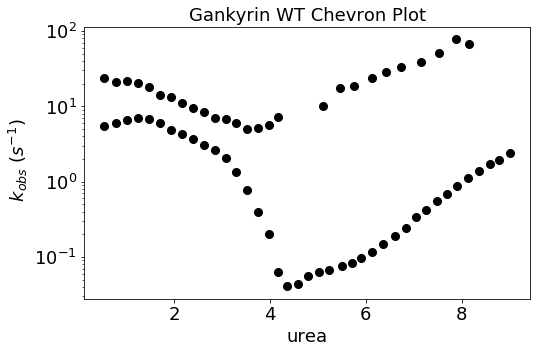

In [3]:
# easy plotting of the entire dataset ...
GankyrinChevron.plot()

Note that the measurements were performed at $25^\text{o}$C.  This is the default for pyFolding.  However lets set this just for saftey.

In [4]:
pyfolding.set_temperature(25.0)

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)


---

#### OK, now we can try fitting the data to a series of protein folding models automatically 

Lets first list the models that are already in PyFolding.

#### We can list the models in pyfolding:

In [5]:
# Command imports pyfolding models
from pyfolding.models import *

# command lists models
list_models()

# After the model name:
#'Verified: True' signifies that we have tested the model and it functions as expected.
#'Verified:False' signifies that the model has not been rigourously tested.

[('CurvedChevronPolynomialFit', 'Verified: True'),
 ('HeteropolymerIsingEquilibrium', 'Verified: False'),
 ('HomozipperIsingEquilibrium', 'Verified: True'),
 ('ParallelTwoStateChevron', 'Verified: False'),
 ('ParallelTwoStateUnfoldingChevron', 'Verified: False'),
 ('TemplateModel', 'Verified: False'),
 ('ThreeStateChevron', 'Verified: True'),
 ('ThreeStateDimericIEquilibrium', 'Verified: True'),
 ('ThreeStateEquilibrium', 'Verified: True'),
 ('ThreeStateFastPhaseChevron', 'Verified: True'),
 ('ThreeStateMonoIEquilibrium', 'Verified: True'),
 ('ThreeStateSequentialChevron', 'Verified: True'),
 ('TwoStateChevron', 'Verified: True'),
 ('TwoStateChevronMovingTransition', 'Verified: True'),
 ('TwoStateDimerEquilibrium', 'Verified: True'),
 ('TwoStateEquilibrium', 'Verified: True'),
 ('TwoStateEquilibriumSloping', 'Verified: True')]

---
If you want to see more remember you can print out the model for viewing and then print out the variables of the model as per the commands given in PyFolding SI Notebook 1.

### Now lets fit to multiple models

Fitting results
ID: Gankyrin WT
Model: TwoStateChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kf   42.82617 ± 7.83661    	 95% CI[  40.86319,   44.78916]
(f) mf    1.32179 ± 0.06202    	 95% CI[   1.30625,    1.33733]
(f) ku    0.00005 ± 0.00004    	 95% CI[   0.00004,    0.00006]
(f) mu    1.21849 ± 0.09285    	 95% CI[   1.19524,    1.24175]
--------------------------------------------------------------------------------
R^2: 0.89052




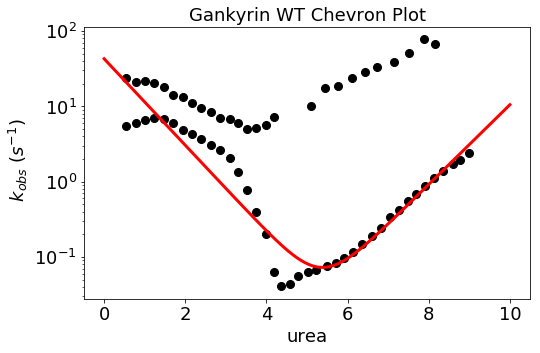

Fitting results
ID: Gankyrin WT
Model: ThreeStateChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kfi    0.00032 ± 0.00001    	 95% CI[   0.00032,    0.00032]
(f) mif   -0.99293 ± 0.00453    	 95% CI[  -0.99406,   -0.99179]
(f) kif 3088058.06844 ± 591967.31125 	 95% CI[2939903.22853, 3236212.90836]
(f) mi    -5.23401 ± 0.04790    	 95% CI[  -5.24600,   -5.22202]
(f) Kiu    0.00000 ± 0.00000    	 95% CI[   0.00000,    0.00000]
(f) mu    -1.30465 ± 0.01243    	 95% CI[  -1.30776,   -1.30154]
--------------------------------------------------------------------------------
R^2: 0.99254




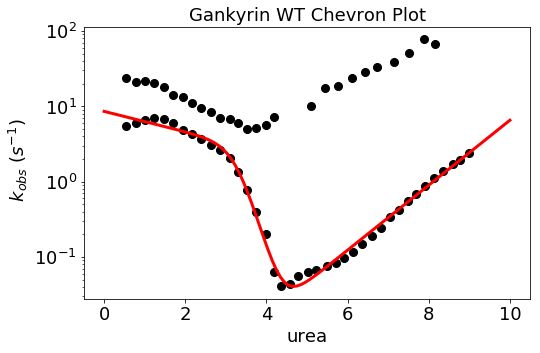

Fitting results
ID: Gankyrin WT
Model: ThreeStateSequentialChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kui    8.31020 ± inf        	 95% CI[      -inf,        inf]
(f) mui    0.28628 ± inf        	 95% CI[      -inf,        inf]
(c) kiu 10000.00000
(c) miu    0.00000
(f) kif 1928214860.70398 ± inf        	 95% CI[      -inf,        inf]
(f) mif    3.78592 ± inf        	 95% CI[      -inf,        inf]
(f) kfi    0.00031 ± inf        	 95% CI[      -inf,        inf]
(f) mfi    0.99732 ± inf        	 95% CI[      -inf,        inf]
--------------------------------------------------------------------------------
R^2: 0.99250




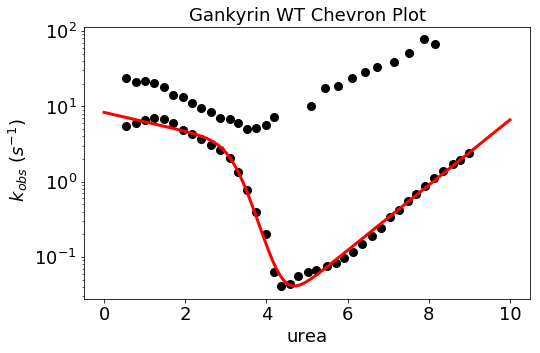

Fitting results
ID: Gankyrin WT
Model: ThreeStateFastPhaseChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kui  652.84238 ± 99224234.60024 	 95% CI[-24808828.14928, 24810133.83404]
(f) mui    2.17159 ± nan        	 95% CI[       nan,        nan]
(f) kiu    0.00091 ± 137.88273  	 95% CI[ -34.47453,   34.47634]
(f) miu    1.75744 ± nan        	 95% CI[       nan,        nan]
(f) kif 6166635.56167 ± 1276444.10689 	 95% CI[5847480.50913, 6485790.61421]
(f) mif    4.24069 ± 0.05286    	 95% CI[   4.22748,    4.25391]
(f) kfi    0.00032 ± 0.00001    	 95% CI[   0.00032,    0.00032]
(f) mfi    0.99294 ± 0.00482    	 95% CI[   0.99173,    0.99414]
--------------------------------------------------------------------------------
R^2: 0.99254




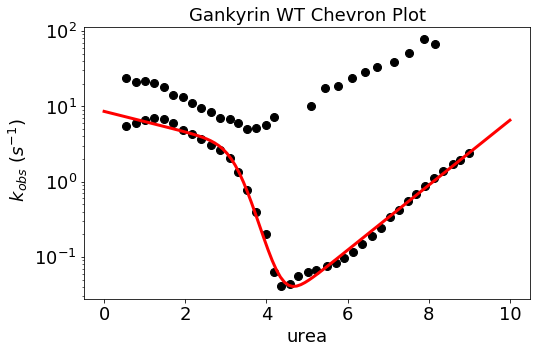

Fitting results
ID: Gankyrin WT
Model: TwoStateChevronMovingTransition
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) ku         0.00000 ± 0.00000    	 95% CI[   0.00000,    0.00000]
(f) mu         4.98449 ± 0.25547    	 95% CI[   4.92052,    5.04845]
(f) kf         8.64128 ± 1.19561    	 95% CI[   8.34192,    8.94064]
(f) mf         0.19051 ± 0.10469    	 95% CI[   0.16429,    0.21672]
(f) m_prime   -0.27314 ± 0.01801    	 95% CI[  -0.27764,   -0.26863]
--------------------------------------------------------------------------------
R^2: 0.94901




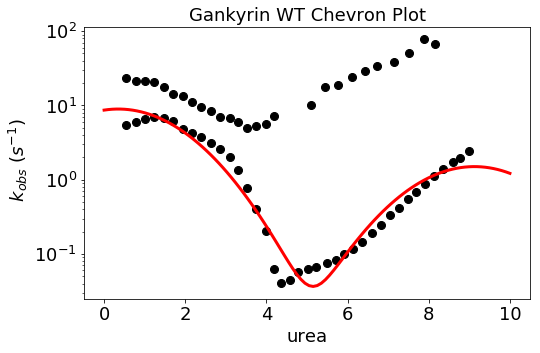

Fitting results
ID: Gankyrin WT
Model: CurvedChevronPolynomialFit
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) ku          0.00062 ± 0.00020    	 95% CI[   0.00056,    0.00067]
(f) mu          0.76331 ± 0.09633    	 95% CI[   0.73920,    0.78742]
(f) mu_prime    0.01845 ± 0.00691    	 95% CI[   0.01672,    0.02018]
(f) kf          1.92293 ± 0.09362    	 95% CI[   1.89950,    1.94636]
(f) mf          1.82503 ± 0.04649    	 95% CI[   1.81339,    1.83666]
(f) mf_prime   -0.61791 ± 0.00971    	 95% CI[  -0.62034,   -0.61548]
--------------------------------------------------------------------------------
R^2: 0.98724




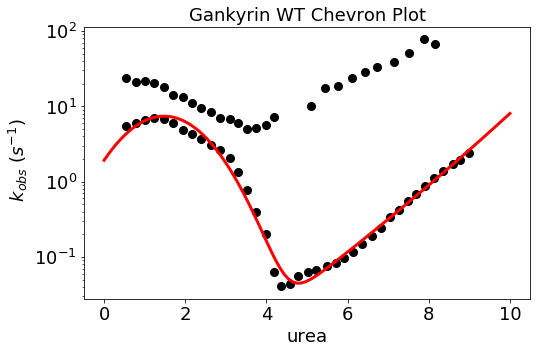

In [9]:
# make a list of models to be used to fit in the square brackets
test_models = [models.TwoStateChevron, 
               models.ThreeStateChevron, 
               models.ThreeStateSequentialChevron,
               models.ThreeStateFastPhaseChevron,
               models.TwoStateChevronMovingTransition,
               models.CurvedChevronPolynomialFit]

               #now tell Pyfolding to fit your data to each model
for model in test_models:
    GankyrinChevron.fit_func = model   # 1st select the fit function and associates it with the data ()
    GankyrinChevron.fit()              # then fit it. 
    GankyrinChevron.plot()             # then plot them, can add (components=True) to plot component rate constants

---
### We can also fit to multiple models and output the "prettier" graphics 
(as in PyFolding SI Notebook 1)

Fitting results
ID: GankyrinEquilmDenaturationCurve
Model: TwoStateEquilibriumSloping
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) alpha_f  -37.25158 ± 0.14271    	 95% CI[ -37.28741,  -37.21575]
(f) beta_f    -0.49562 ± 0.06439    	 95% CI[  -0.51179,   -0.47946]
(f) alpha_u   26.33776 ± 0.48279    	 95% CI[  26.21654,   26.45898]
(f) beta_u     1.06005 ± 0.09104    	 95% CI[   1.03719,    1.08291]
(f) m          2.90885 ± 0.05757    	 95% CI[   2.89439,    2.92330]
(f) d50        4.12424 ± 0.00486    	 95% CI[   4.12302,    4.12546]
--------------------------------------------------------------------------------
R^2: 0.99869




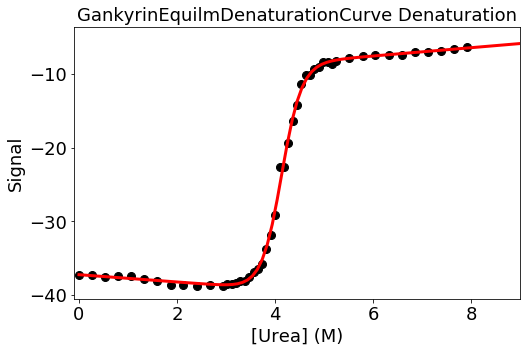

In [7]:
# First load in the Equilm denaturation (as per PyFolding SI Notebook 1)
pth = "../examples/Gankyrin"
GankyrinEquilm = pyfolding.read_equilibrium_data(pth,"GankyrinEquilmDenaturationCurve.csv")

#1st select the fit function and associates it with the data
GankyrinEquilm.fit_func = models.TwoStateEquilibriumSloping

#then fit it. 
GankyrinEquilm.fit(p0=[-37, 0.1, -15, 0.1, 3,4]) # the brackets enable you to define starting values for the variables see notebook 1

# and plot to check all it OK
GankyrinEquilm.plot()



Fitting results
ID: Gankyrin WT
Model: TwoStateChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kf   42.82617 ± 7.83661    	 95% CI[  40.86319,   44.78916]
(f) mf    1.32179 ± 0.06202    	 95% CI[   1.30625,    1.33733]
(f) ku    0.00005 ± 0.00004    	 95% CI[   0.00004,    0.00006]
(f) mu    1.21849 ± 0.09285    	 95% CI[   1.19524,    1.24175]
--------------------------------------------------------------------------------
R^2: 0.89052




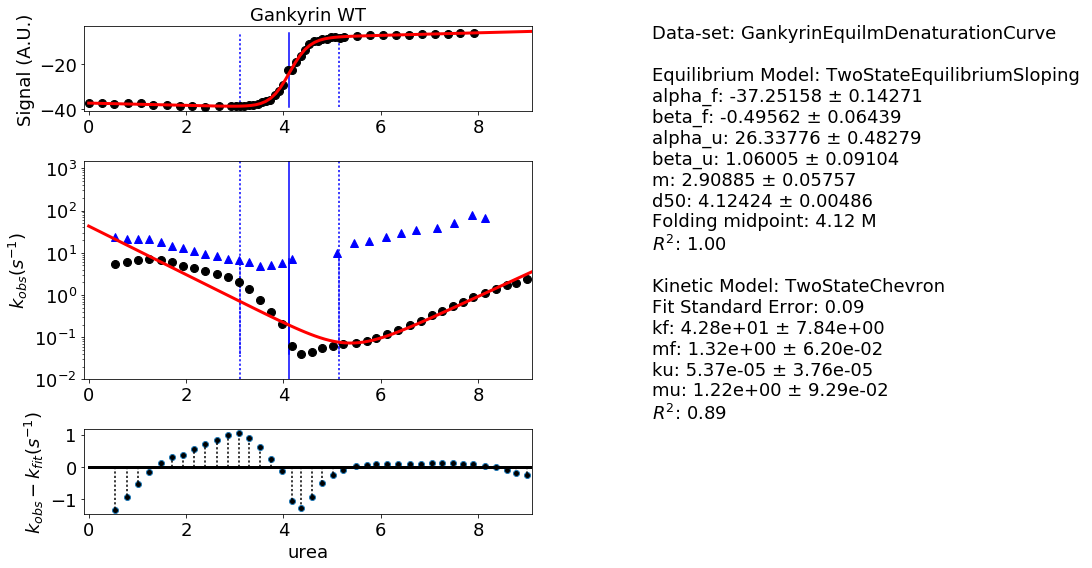

Fitting results
ID: Gankyrin WT
Model: ThreeStateChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kfi    0.00032 ± 0.00001    	 95% CI[   0.00032,    0.00032]
(f) mif   -0.99293 ± 0.00453    	 95% CI[  -0.99406,   -0.99179]
(f) kif 3088058.06844 ± 591967.31125 	 95% CI[2939903.22853, 3236212.90836]
(f) mi    -5.23401 ± 0.04790    	 95% CI[  -5.24600,   -5.22202]
(f) Kiu    0.00000 ± 0.00000    	 95% CI[   0.00000,    0.00000]
(f) mu    -1.30465 ± 0.01243    	 95% CI[  -1.30776,   -1.30154]
--------------------------------------------------------------------------------
R^2: 0.99254




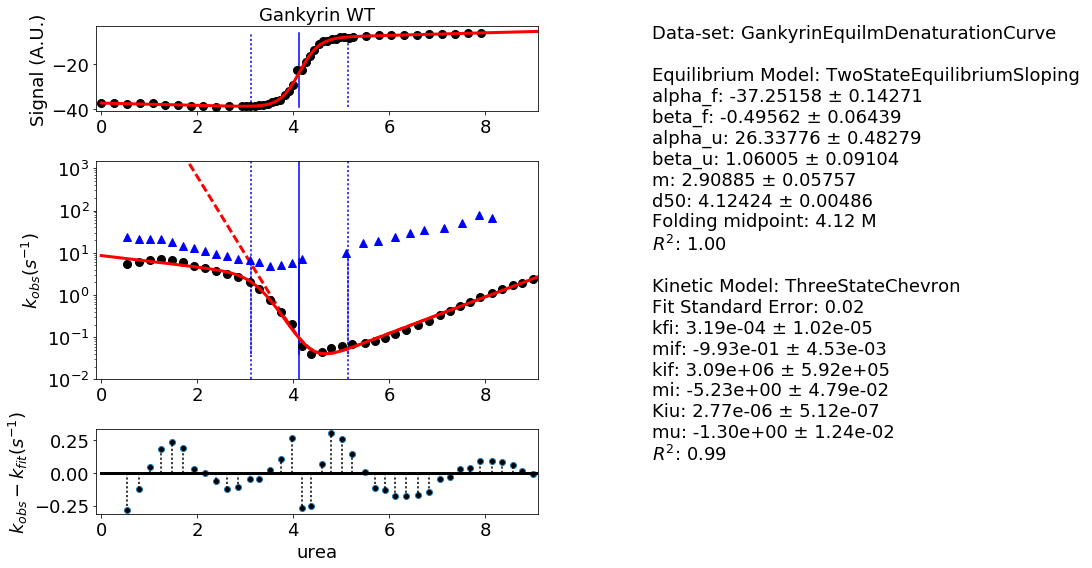

Fitting results
ID: Gankyrin WT
Model: ThreeStateSequentialChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kui    8.31020 ± inf        	 95% CI[      -inf,        inf]
(f) mui    0.28628 ± inf        	 95% CI[      -inf,        inf]
(c) kiu 10000.00000
(c) miu    0.00000
(f) kif 1928214860.70398 ± inf        	 95% CI[      -inf,        inf]
(f) mif    3.78592 ± inf        	 95% CI[      -inf,        inf]
(f) kfi    0.00031 ± inf        	 95% CI[      -inf,        inf]
(f) mfi    0.99732 ± inf        	 95% CI[      -inf,        inf]
--------------------------------------------------------------------------------
R^2: 0.99250




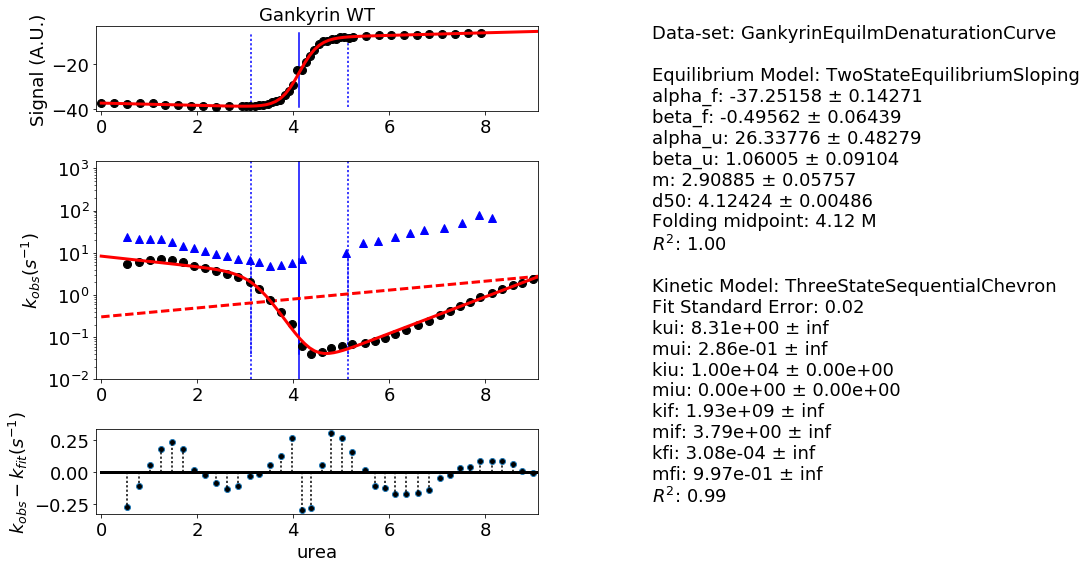

Fitting results
ID: Gankyrin WT
Model: ThreeStateFastPhaseChevron
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) kui  652.84238 ± 99224234.60024 	 95% CI[-24808828.14928, 24810133.83404]
(f) mui    2.17159 ± nan        	 95% CI[       nan,        nan]
(f) kiu    0.00091 ± 137.88273  	 95% CI[ -34.47453,   34.47634]
(f) miu    1.75744 ± nan        	 95% CI[       nan,        nan]
(f) kif 6166635.56167 ± 1276444.10689 	 95% CI[5847480.50913, 6485790.61421]
(f) mif    4.24069 ± 0.05286    	 95% CI[   4.22748,    4.25391]
(f) kfi    0.00032 ± 0.00001    	 95% CI[   0.00032,    0.00032]
(f) mfi    0.99294 ± 0.00482    	 95% CI[   0.99173,    0.99414]
--------------------------------------------------------------------------------
R^2: 0.99254




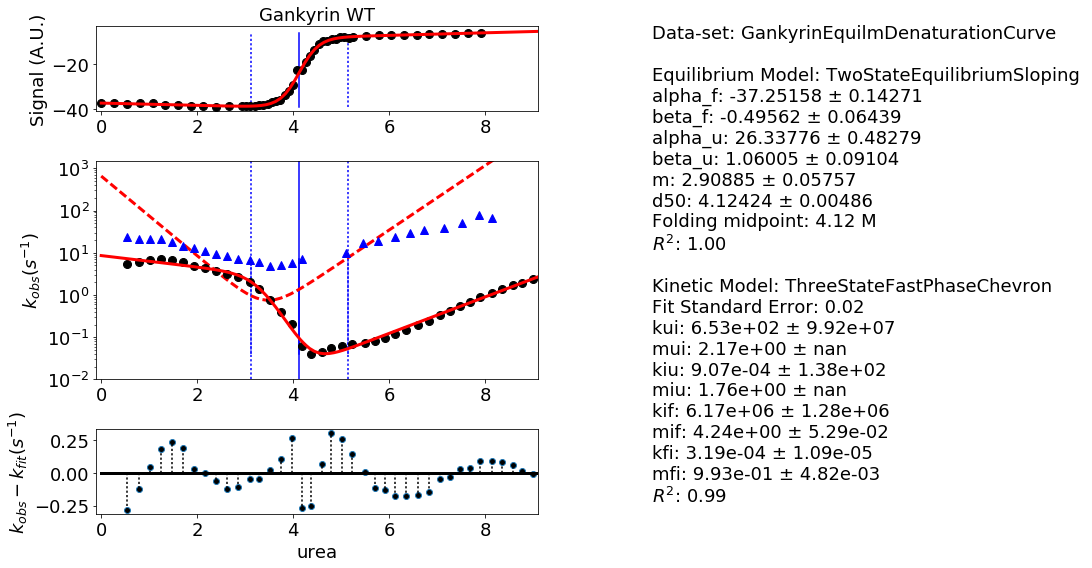

Fitting results
ID: Gankyrin WT
Model: TwoStateChevronMovingTransition
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) ku         0.00000 ± 0.00000    	 95% CI[   0.00000,    0.00000]
(f) mu         4.98449 ± 0.25547    	 95% CI[   4.92052,    5.04845]
(f) kf         8.64128 ± 1.19561    	 95% CI[   8.34192,    8.94064]
(f) mf         0.19051 ± 0.10469    	 95% CI[   0.16429,    0.21672]
(f) m_prime   -0.27314 ± 0.01801    	 95% CI[  -0.27764,   -0.26863]
--------------------------------------------------------------------------------
R^2: 0.94901




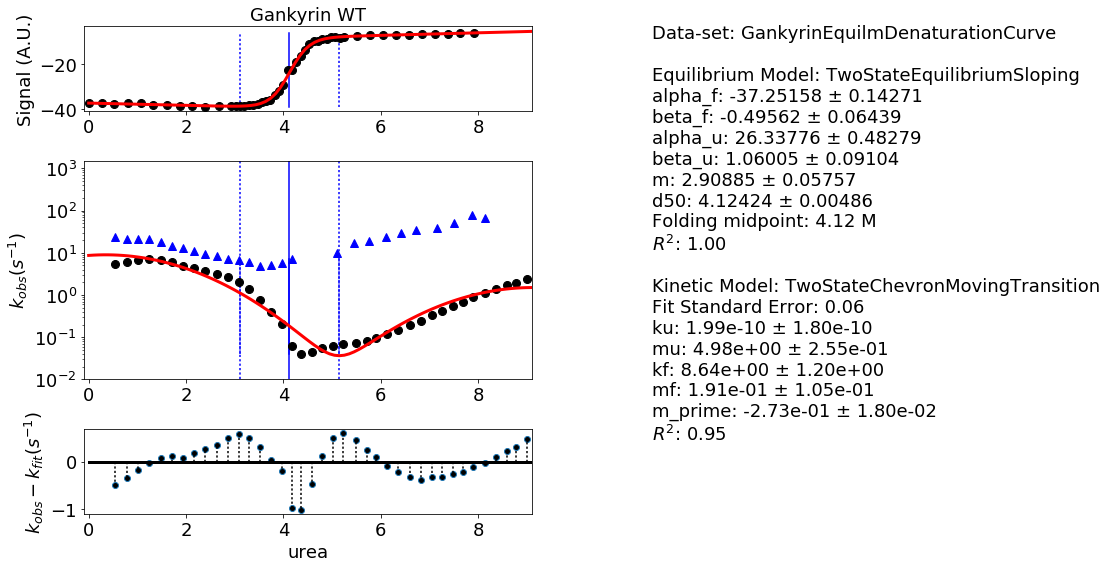

Fitting results
ID: Gankyrin WT
Model: CurvedChevronPolynomialFit
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) ku          0.00062 ± 0.00020    	 95% CI[   0.00056,    0.00067]
(f) mu          0.76331 ± 0.09633    	 95% CI[   0.73920,    0.78742]
(f) mu_prime    0.01845 ± 0.00691    	 95% CI[   0.01672,    0.02018]
(f) kf          1.92293 ± 0.09362    	 95% CI[   1.89950,    1.94636]
(f) mf          1.82503 ± 0.04649    	 95% CI[   1.81339,    1.83666]
(f) mf_prime   -0.61791 ± 0.00971    	 95% CI[  -0.62034,   -0.61548]
--------------------------------------------------------------------------------
R^2: 0.98724




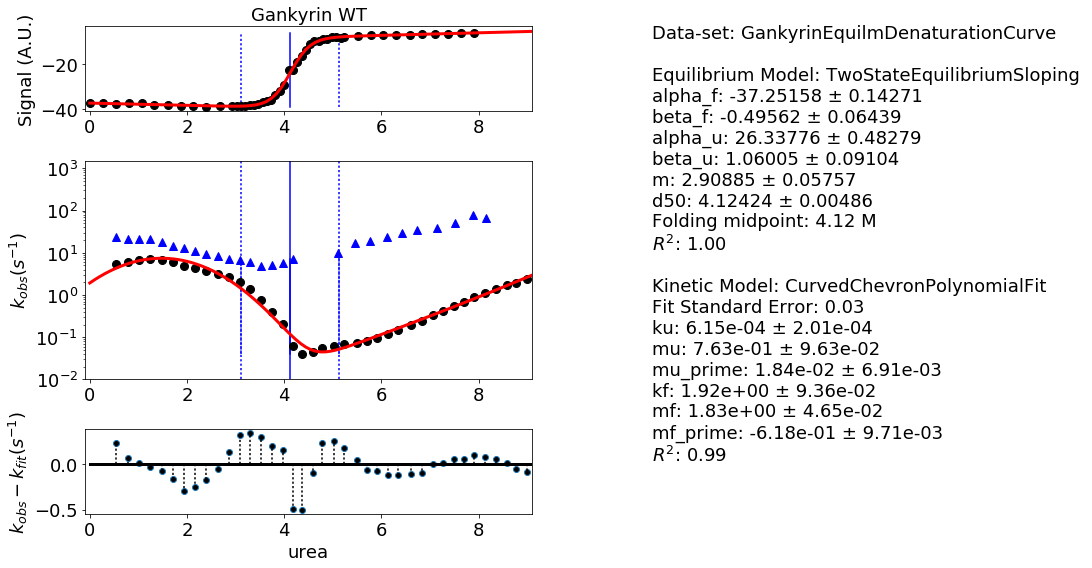

In [8]:
# again make a list of models to be used to fit in the square brackets
test_models = [models.TwoStateChevron,
               models.ThreeStateChevron, 
               models.ThreeStateSequentialChevron,  
               models.ThreeStateFastPhaseChevron,
               models.TwoStateChevronMovingTransition,
               models.CurvedChevronPolynomialFit]

#now tell Pyfolding to fit your data to each model
for model in test_models:
    GankyrinChevron.fit_func = model                                    # 1st select the fit function and associates it with the data ()
    GankyrinChevron.fit()                                               # then fit it. 
    pyfolding.plot_figure(GankyrinEquilm, GankyrinChevron, display=True) # then plot them with output parameters

---

### End of this Notebook.

---